In [5]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
data = np.random.randn(100, 5)
df = pd.DataFrame(data, columns=['Feature ' + str(i) for i in range(1, 6)])

In [4]:
df

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,0.496714,-0.138264,0.647689,1.523030,-0.234153
1,-0.234137,1.579213,0.767435,-0.469474,0.542560
2,-0.463418,-0.465730,0.241962,-1.913280,-1.724918
3,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
4,1.465649,-0.225776,0.067528,-1.424748,-0.544383
...,...,...,...,...,...
95,-0.249036,0.576557,0.311250,3.078881,1.119575
96,-0.127918,-0.955540,-1.606446,0.203464,-0.756351
97,-1.422254,-0.646573,-1.081548,1.687142,0.881640
98,-0.007973,1.479944,0.077368,-0.861284,1.523124


In [6]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [7]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)

In [11]:
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component ' + str(i) for i in range(1, 3)])

In [16]:
pca_df

,Principal Component 1,Principal Component 2
0,-0.075174,-0.288470
1,-1.213757,-1.287095
2,1.322085,-0.707164
3,1.092411,-0.183511
4,1.858440,-1.252090
...,...,...
95,-1.964774,0.681381
96,1.147474,1.597318
97,-1.156301,2.215237
98,-1.112114,-0.886965


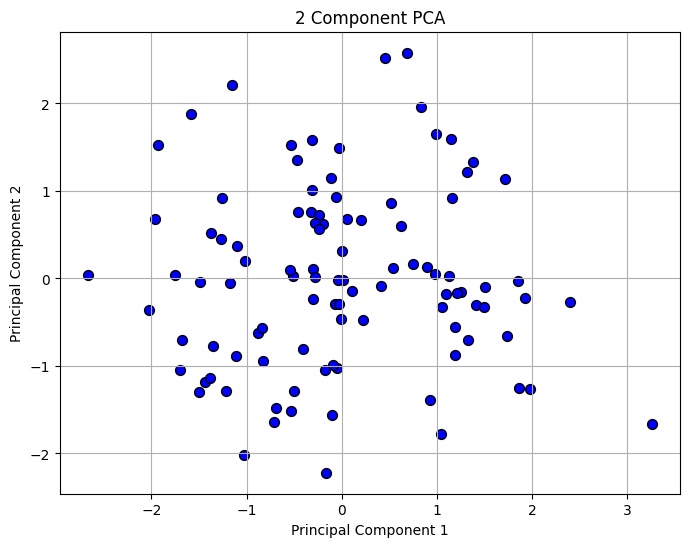

In [12]:
# Visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.grid()
plt.show()

In [13]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of the components:", explained_variance)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative explained variance ratio:", cumulative_explained_variance)

Explained variance ratio of the components: [0.25707979 0.21272367]
Cumulative explained variance ratio: [0.25707979 0.46980346]


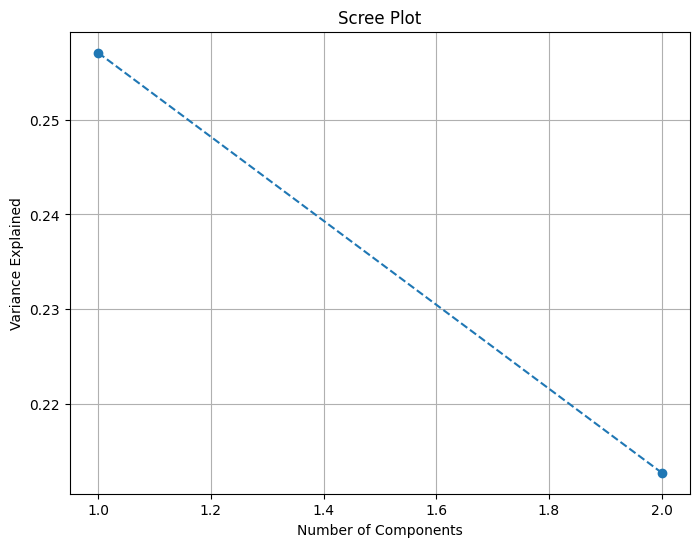

In [14]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [15]:
loading_scores = pd.DataFrame(pca.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=df.columns)
print("Loading scores:\n", loading_scores)

Loading scores:
            Principal Component 1  Principal Component 2
Feature 1               0.590383              -0.385718
Feature 2              -0.562465              -0.311884
Feature 3              -0.222864              -0.799726
Feature 4              -0.320135               0.335421
Feature 5              -0.427698               0.043376
